# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
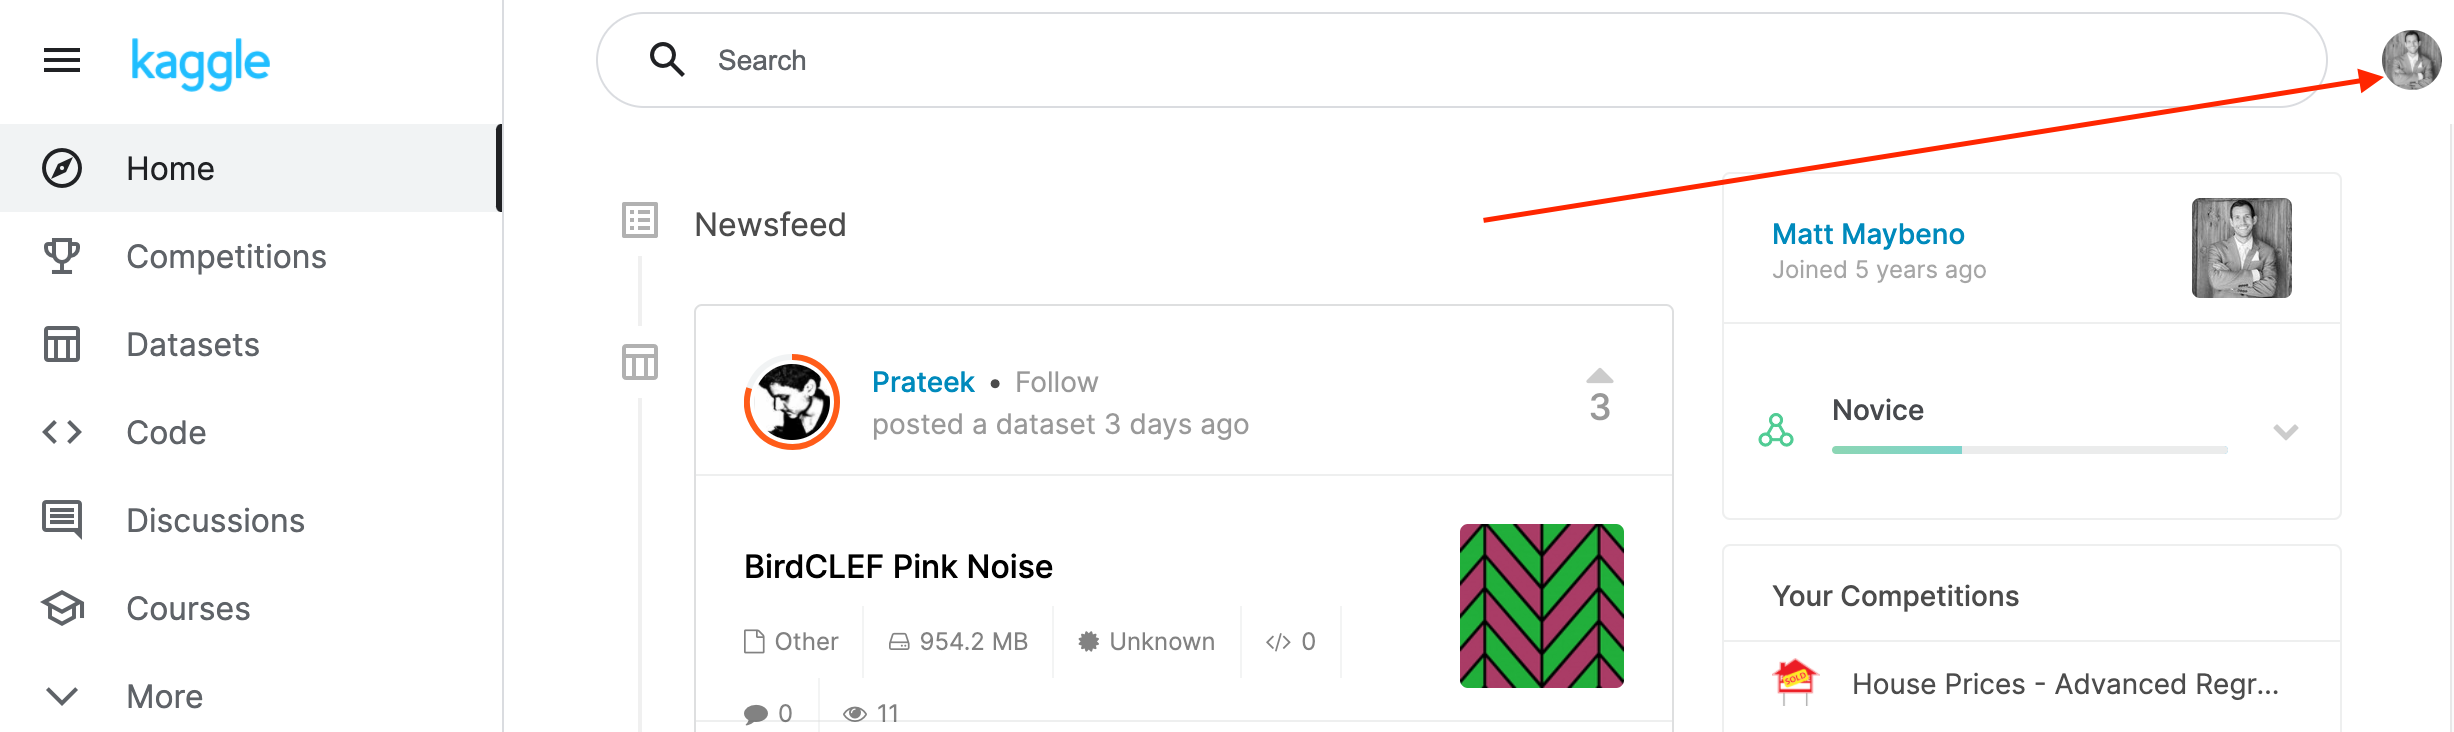
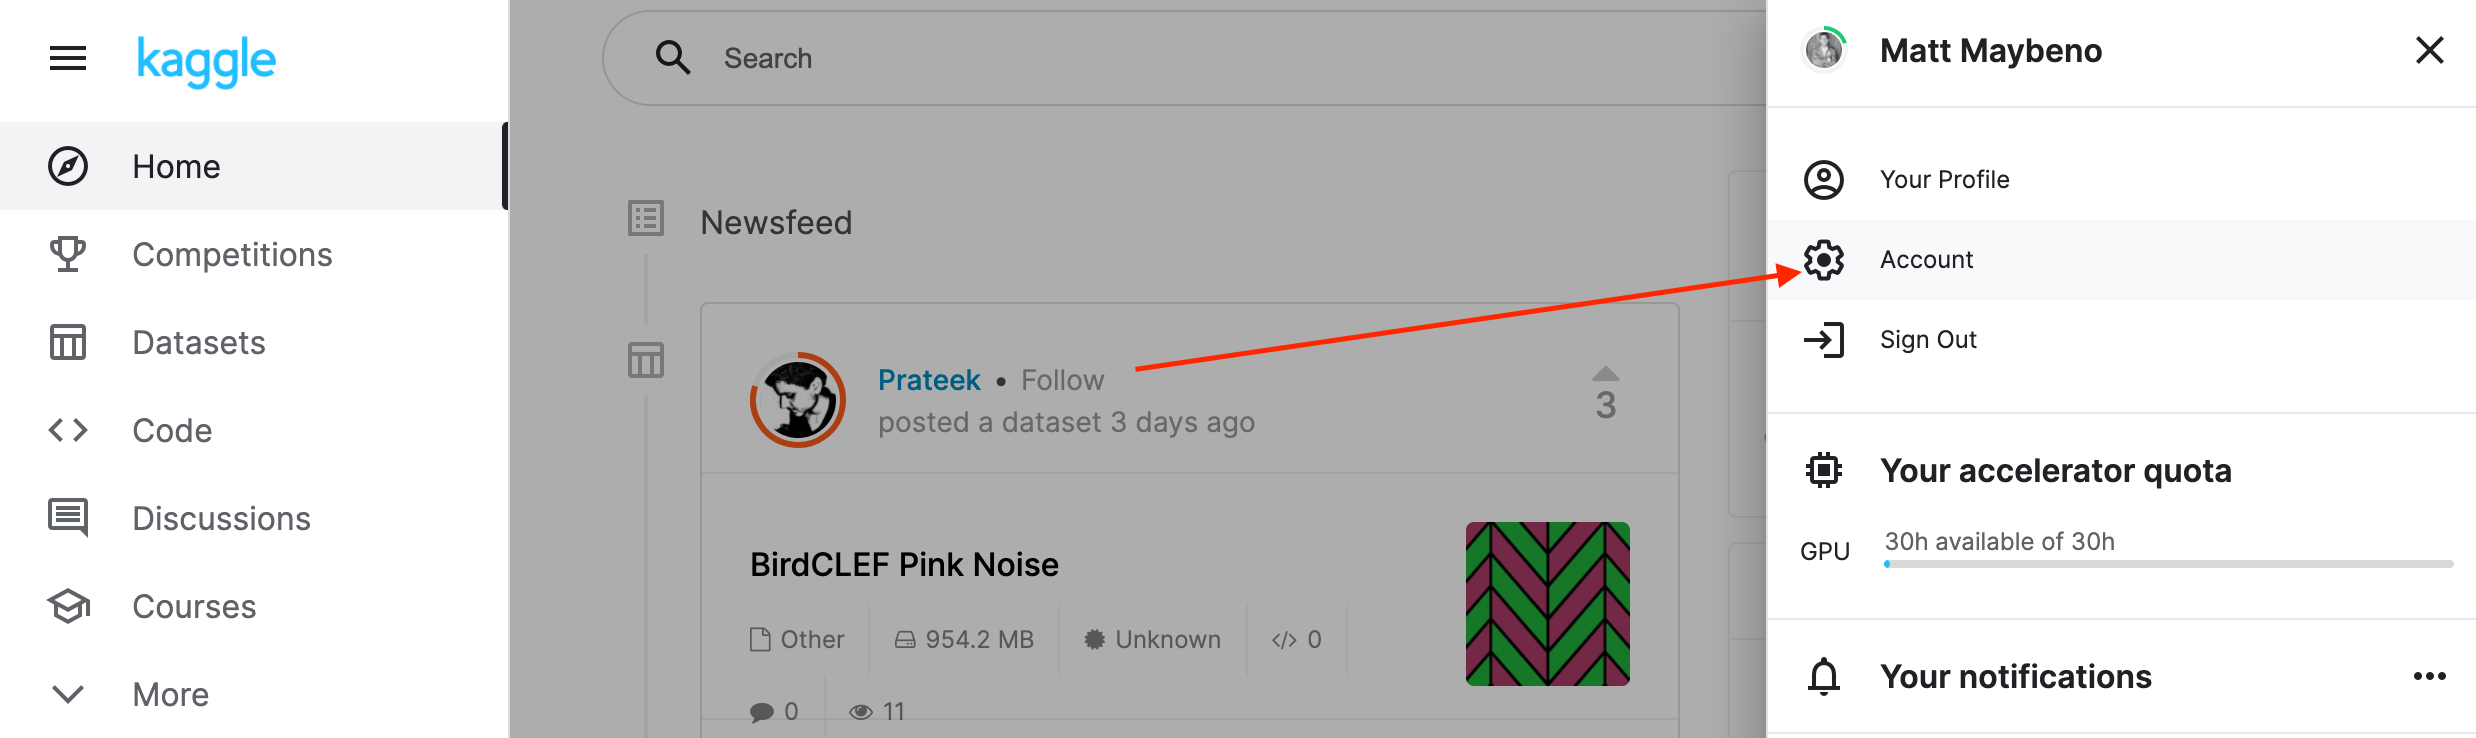
2. Scroll down to API and click Create New API Token.
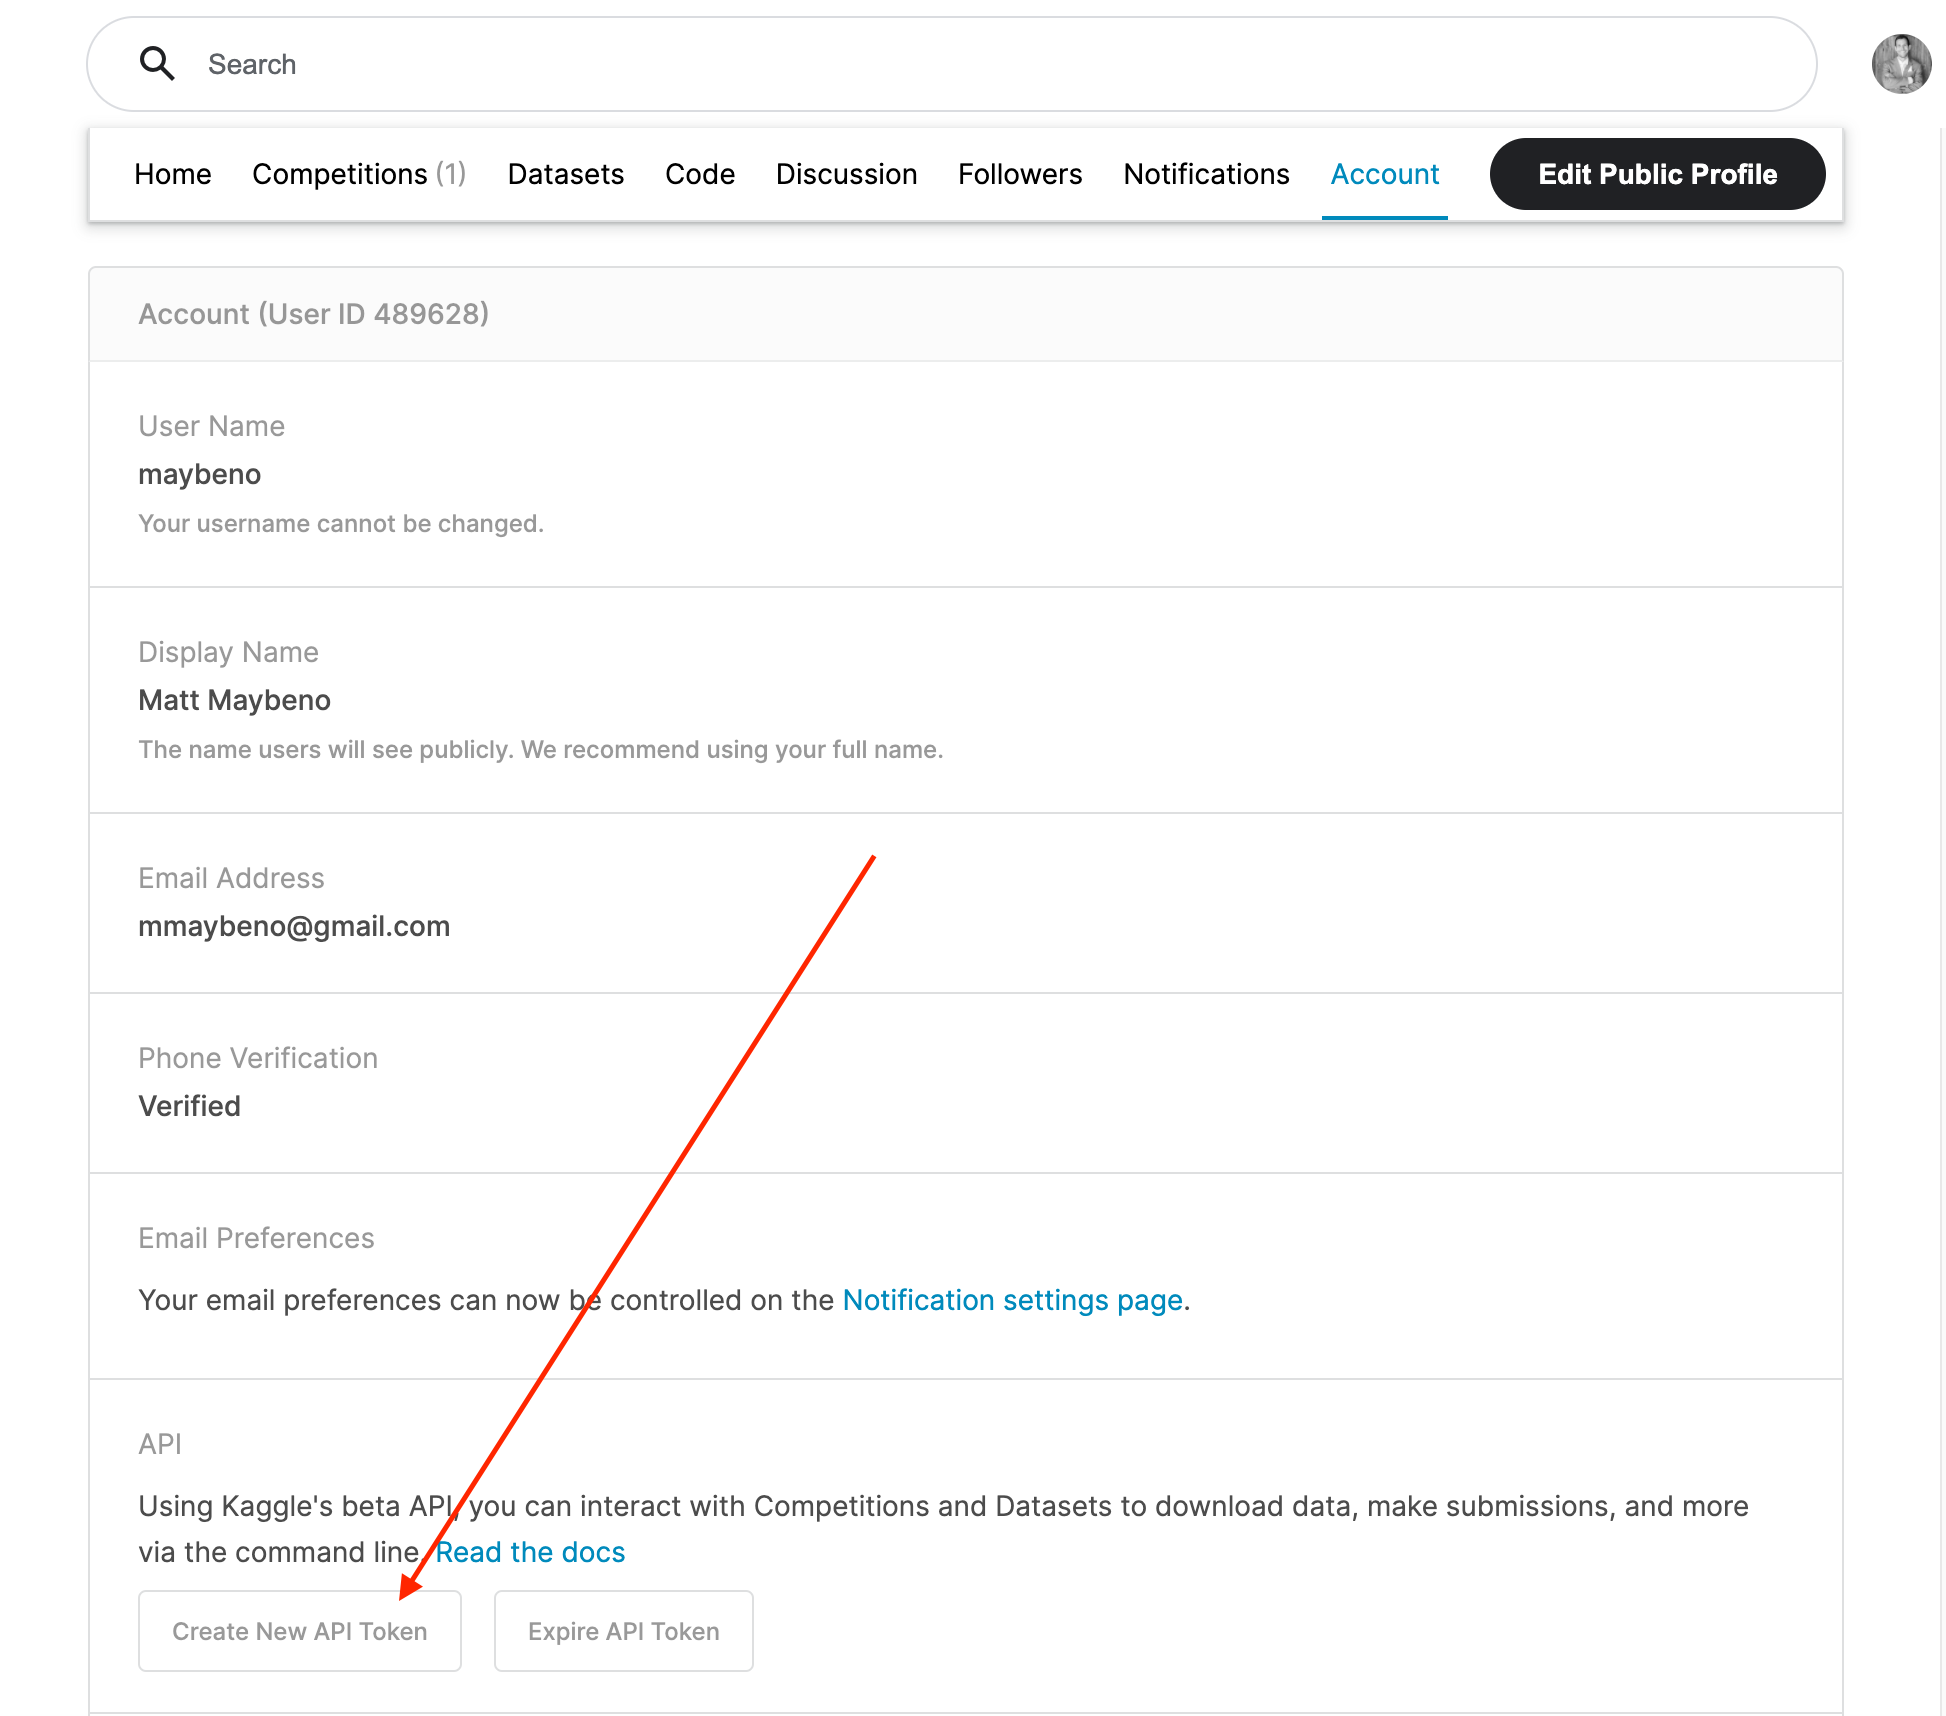
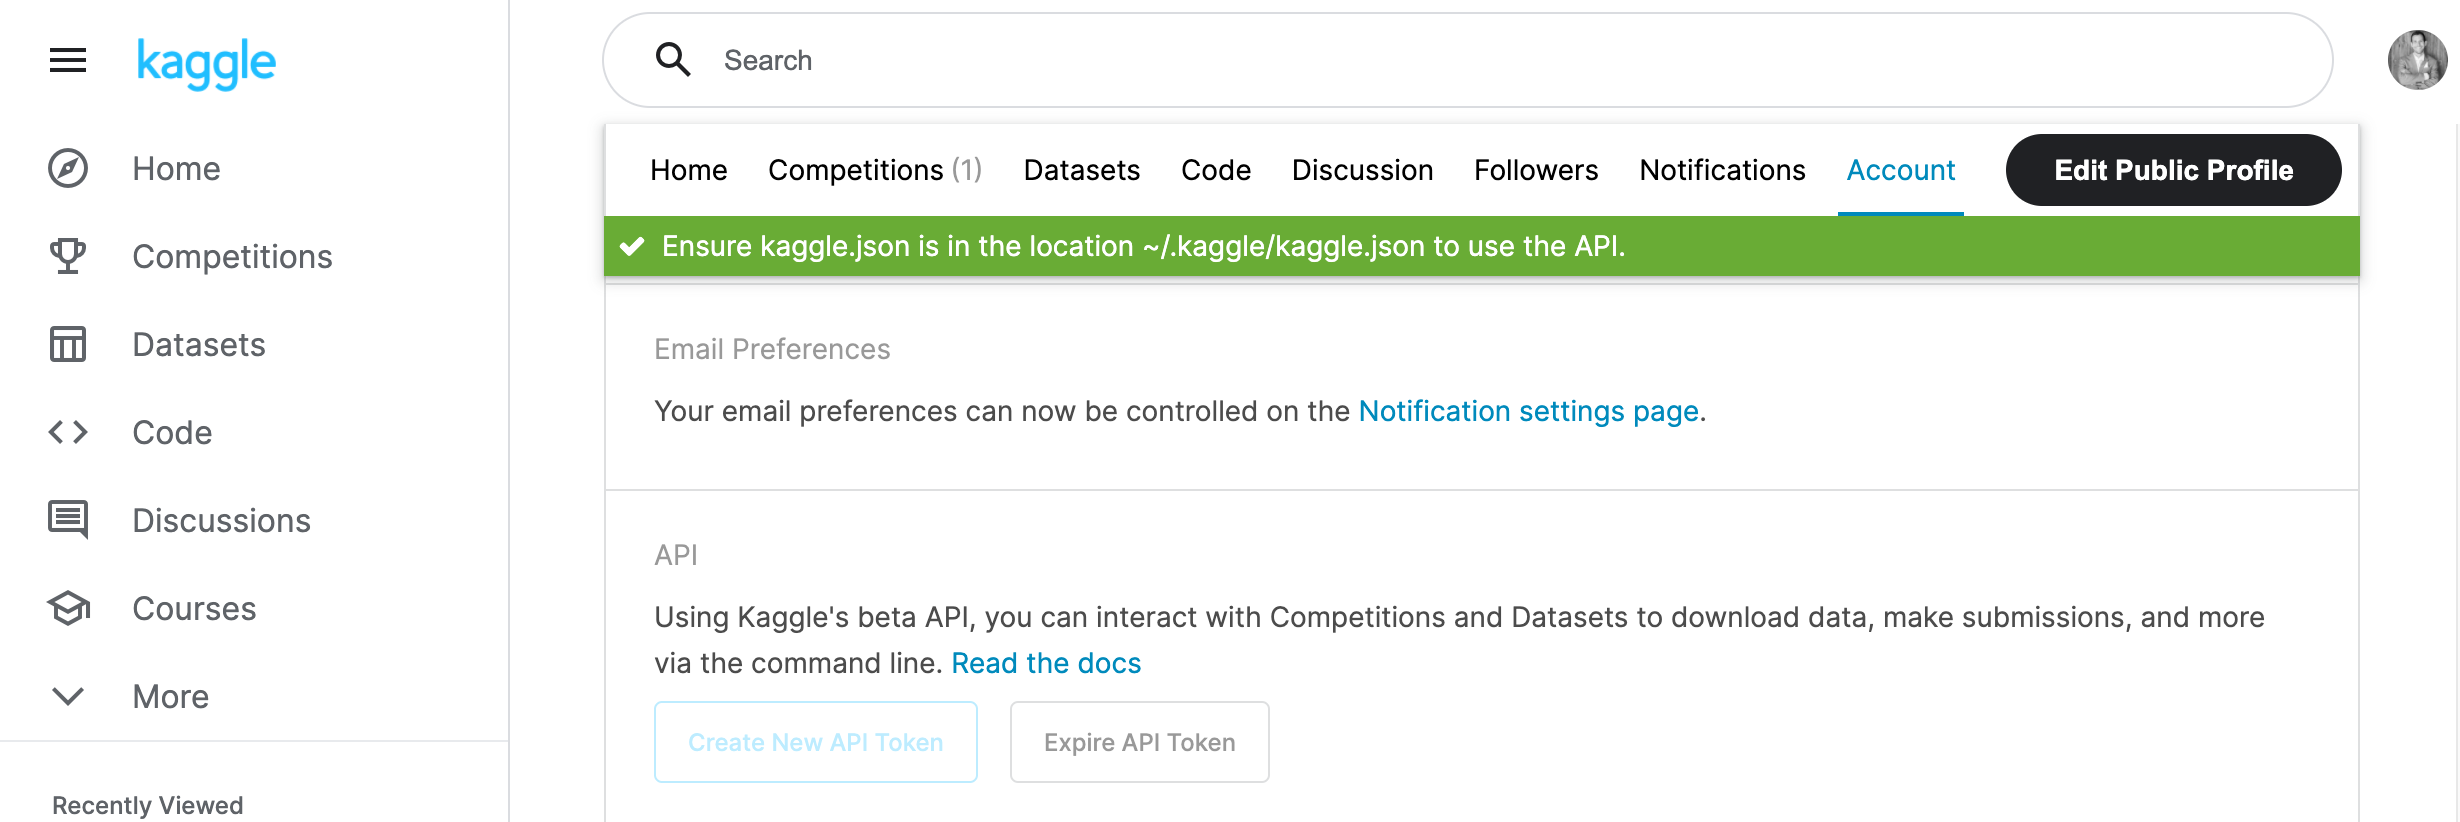
3. Open up `kaggle.json` and use the username and key.
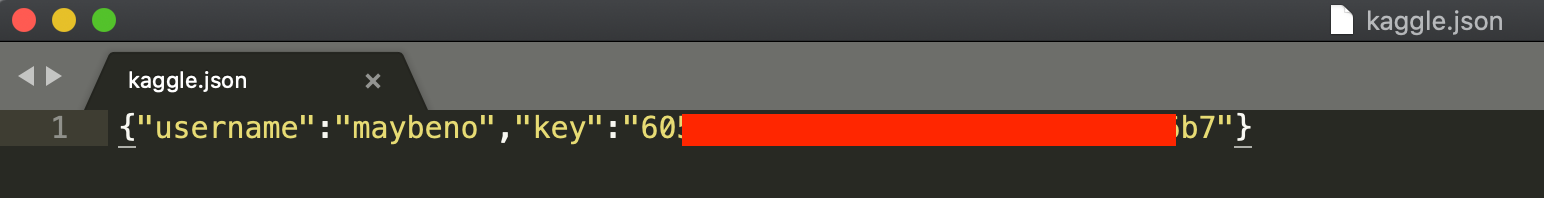

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
#!mkdir -p /root/.kaggle
#!touch .kaggle/kaggle.json
!chmod 600 .kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "geomej"
kaggle_key = "mykey"

# Save API token the kaggle.json file
with open("/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
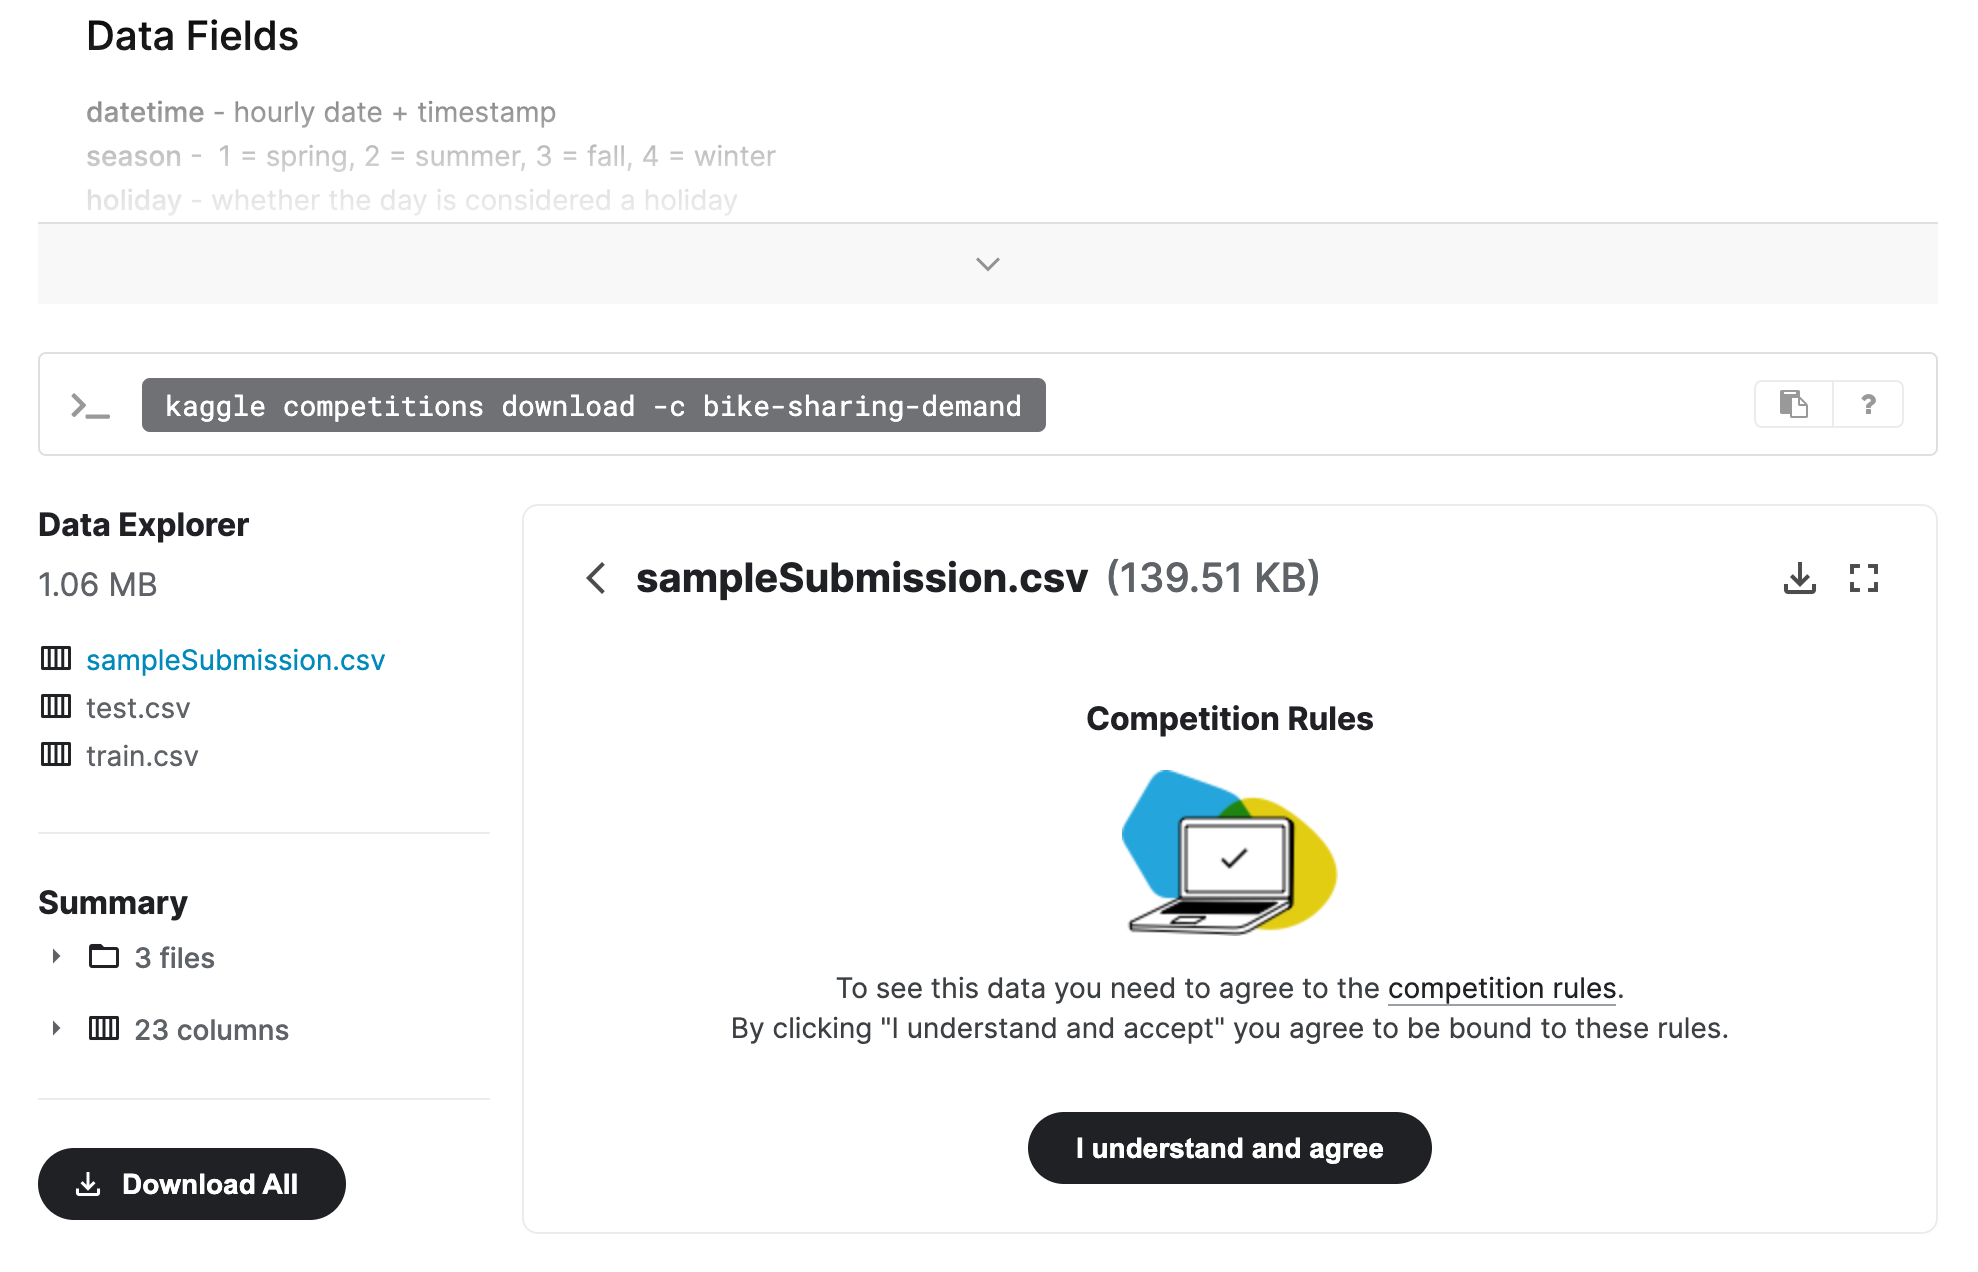

In [1]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

zsh:1: command not found: kaggle
unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('data/train.csv', parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('data/test.csv', parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
# Same thing as train and test dataset
submission = pd.read_csv('data/sampleSubmission.csv', parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [7]:
predictor = TabularPredictor(
    label="count",
    problem_type="regression",
    eval_metric="root_mean_squared_error",
    learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230915_235228/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230915_235228/"
AutoGluon Version:  0.8.2
Python Version:     3.9.6
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 22.1.0: Sun Oct  9 20:14:54 PDT 2022; root:xnu-8792.41.9~2/RELEASE_X86_64
Disk Space Avail:   8.79 GB / 250.69 GB (3.5%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    7905.86 MB
	Train Da

2023-09-15 18:52:56,530	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 18:52:56,533	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 18:52:56,535	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=55864, ip=127.0.0.1)
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/__init__.py", line 8, in <module>
    from .basic import Booster, Dataset, Sequence, register_logger
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/basic.py", line 110, in <module>
    _LIB = _load_lib()
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3

Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 363.79s of the 563.85s of remaining time.
2023-09-15 18:53:04,687	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 18:53:04,743	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 18:53:04,744	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 18:53:04,747	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for m

2023-09-15 18:58:23,022	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 18:58:23,023	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 18:58:23,026	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
		ray::_ray_fit() (pid=56183, ip=127.0.0.1)
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/__init__.py", line 8, in <module>
    from .basic import Booster, Dataset, Sequence, register_logger
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/

Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 229.51s of the 229.49s of remaining time.
2023-09-15 18:58:38,847	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 18:58:38,852	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 18:58:38,857	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 18:58:38,860	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for m

### Review AutoGluon's training run with ranking of models that did the best.

In [9]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -50.605176       3.897956  427.858769                0.001249           0.701740            3       True         16
1   NeuralNetFastAI_BAG_L2  -51.869874       2.424778  316.042310                0.323723          38.781516            2       True         13
2   RandomForestMSE_BAG_L2  -53.123181       2.752684  285.790667                0.651628           8.529873            2       True         10
3     ExtraTreesMSE_BAG_L2  -53.563358       2.610898  279.234625                0.509842           1.973832            2       True         12
4           XGBoost_BAG_L2  -54.655122       2.302340  292.370054                0.201284          15.109261            2       True         14
5    NeuralNetTorch_BAG_L2  -55.406181       2.411514  377.871808         

/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58817625927

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [1]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

NameError: name 'predictions' is not defined

In [11]:
# How many negative values do we have?
predictions.lt(0).sum().sum()

0

In [12]:
# Set them to zero
predictions = predictions.clip(lower=0)

### Set predictions to submission dataframe, save, and submit

In [13]:
submission["count"] = predictions
submission['count'] = submission['count'].apply(lambda x: round(x))
submission.to_csv("submission600.csv", index=False)

In [14]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

zsh:1: command not found: kaggle


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### Initial score of `1.84779`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

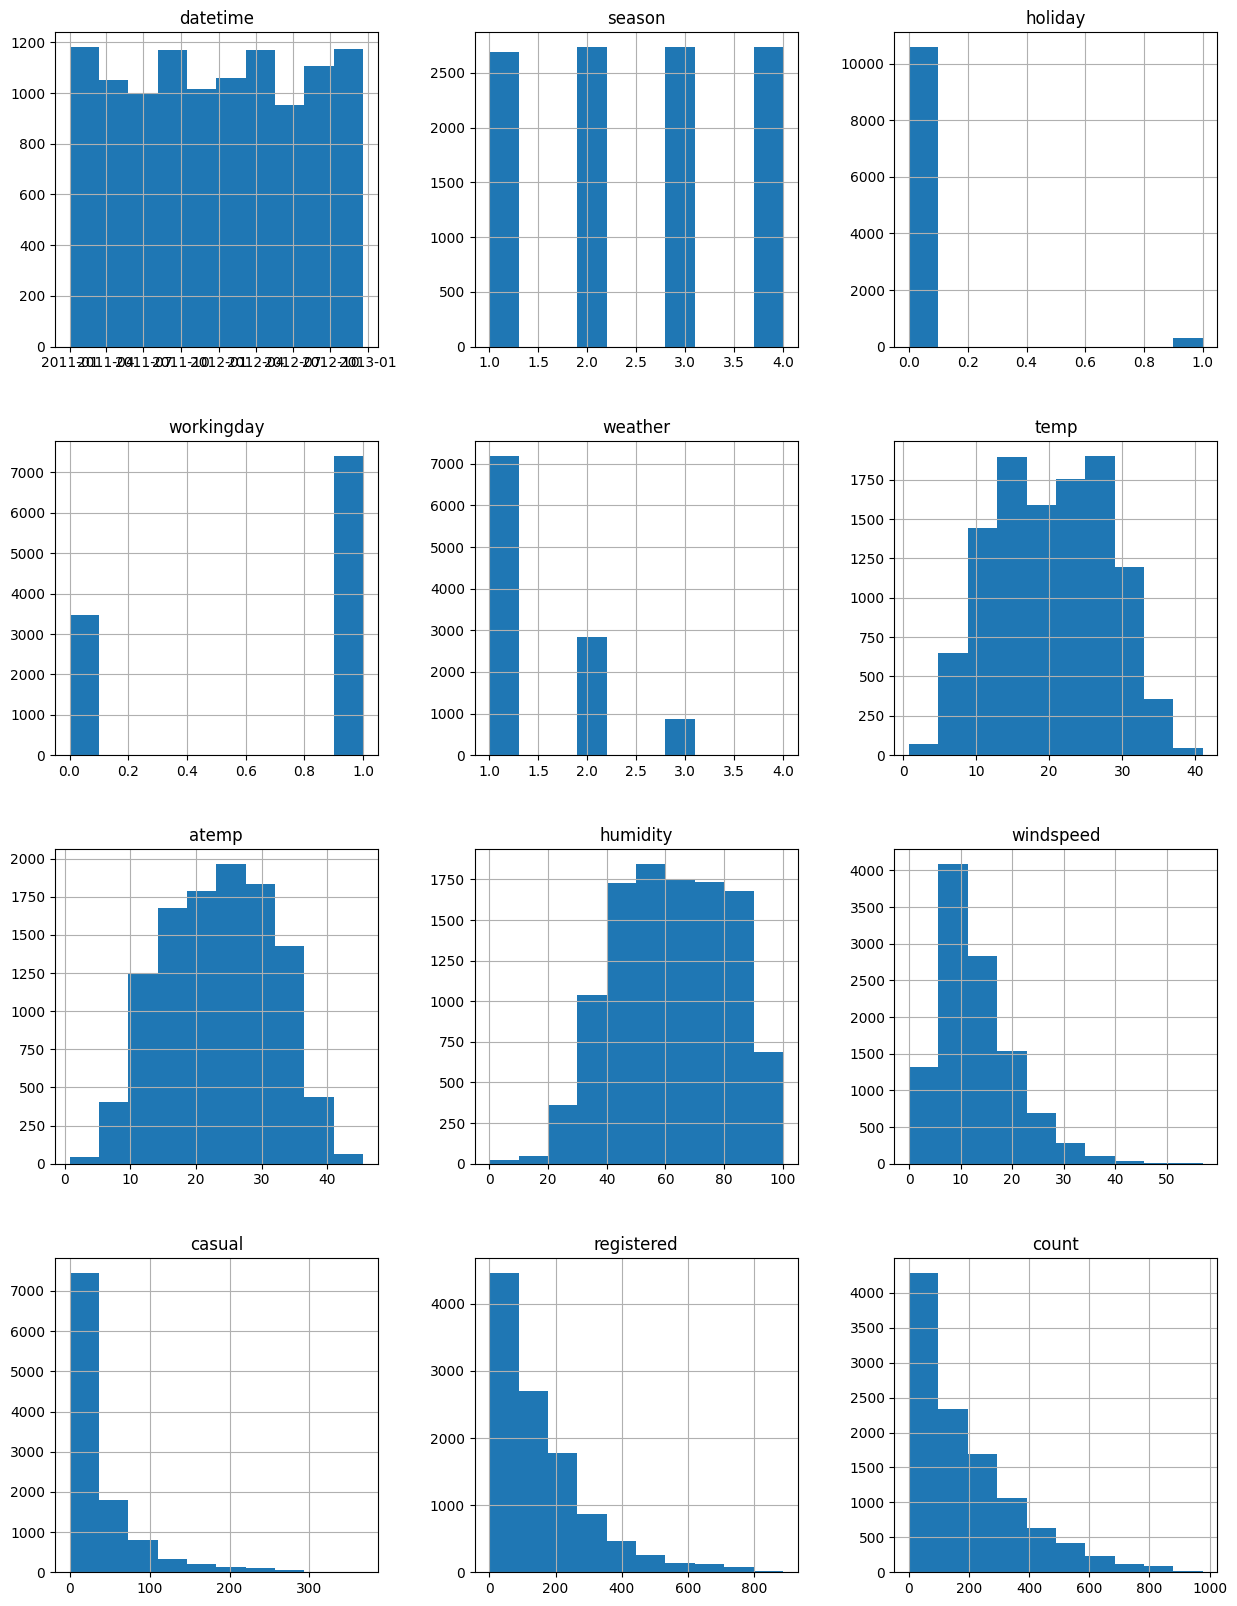

In [16]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15, 20))

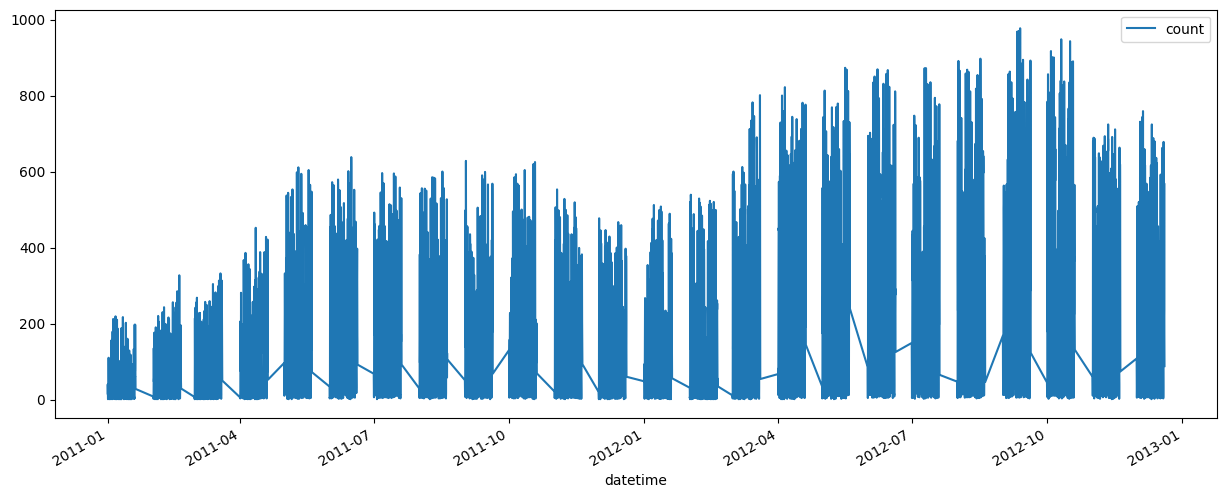

In [17]:
# time series plot for demand
train.plot(x='datetime', y='count', figsize=(15, 6));

In [18]:
# create a new feature
# Seperate hour, day, month from datetime
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [19]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [20]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


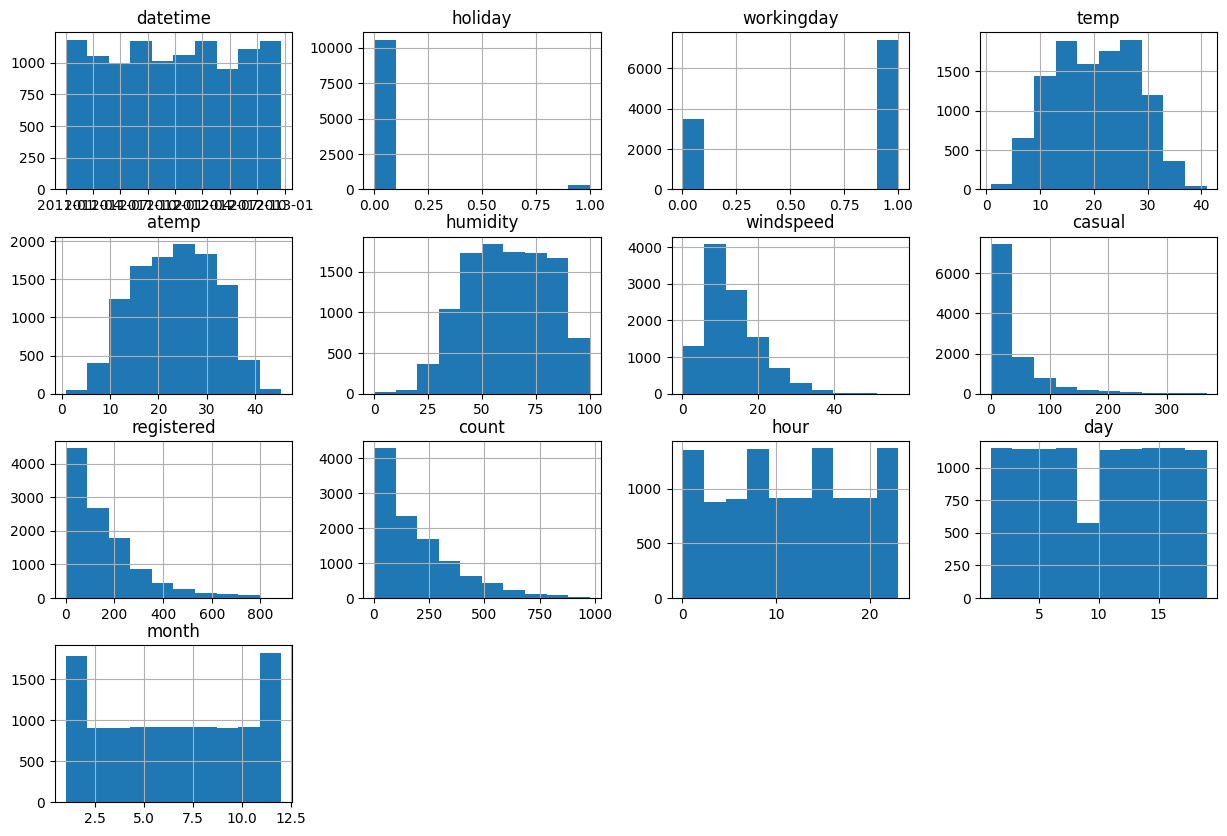

In [21]:
# View histogram of all features again now with the hour feature
train.hist(figsize = (15,10));

## Step 5: Rerun the model with the same settings as before, just with more features

In [22]:
predictor_new_features = TabularPredictor(
    label="count", 
    verbosity=0,
    eval_metric = 'root_mean_squared_error', 
    learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=120, 
    presets="best_quality"
)

		ray::_ray_fit() (pid=47158, ip=127.0.0.1)
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/__init__.py", line 8, in <module>
    from .basic import Booster, Dataset, Sequence, register_logger
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/basic.py", line 110, in <module>
    _LIB = _load_lib()
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/basic.py", line 101, in _load_lib
    lib = ctypes.cdll.LoadLibrary(lib_path[0])
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/ctypes/__init__.py", line 460, in LoadLibrary
    return self._dlltype(name)
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/ctypes/__init__.py", line 382, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen(/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/l

2023-09-15 17:12:34,750	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 17:12:34,752	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 17:12:34,754	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 17:12:34,755	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 17:12:34,757	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UN

2023-09-15 17:13:53,988	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 17:13:53,990	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 17:13:53,994	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 17:13:53,996	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-15 17:13:53,998	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UN

In [23]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -30.911356       1.225993  82.741864                0.001990           0.483894            3       True          8
1         CatBoost_BAG_L2  -30.986218       0.720908  77.585377                0.143108          22.740559            2       True          7
2  RandomForestMSE_BAG_L2  -32.238984       1.080895  59.517411                0.503095           4.672593            2       True          6
3     WeightedEnsemble_L2  -33.195429       0.557615  55.066452                0.000648           0.241370            2       True          5
4         CatBoost_BAG_L1  -33.909500       0.101658  52.213036                0.101658          52.213036            1       True          4
5  RandomForestMSE_BAG_L1  -38.414059       0.434484   2.592489                0.43448

/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58817625927213,
  'KNeighborsDist_BAG_L1': -84.14642264302962,
  'RandomForestMSE_BAG_L1': -38.414058910558104,
  'CatBoost_BAG_L1': -33.90950043272875,
  'WeightedEnsemble_L2': -33.195429450817805,
  'RandomForestMSE_BAG_L2': -32.238983742769754,
  'CatBoost_BAG_L2': -30.986218184126276,
  'WeightedEnsemble_L3': -30.91135606229061},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20230915_221218/models/KNeighborsUnif_BAG_L1/',
  'KNeighborsDist_B

In [24]:
# Get predictions
predictions = predictor_new_features.predict(test)

In [25]:
# Remember to set all negative values to zero
predictions = predictions.clip(lower=0)

In [27]:
# Same submitting predictions
submission_new_features = pd.read_csv('data/sampleSubmission.csv', parse_dates=['datetime'])
submission_new_features["count"] = predictions
# Round count column values
submission_new_features['count'] = submission_new_features['count'].apply(lambda x: round(x))
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.70792`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [29]:
!pip install -q ipywidgets==7.4.2
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [33]:
hyperparameters = {
    'RF': {'n_estimators': 300},
} 

hyperparameter_tune_kwargs = { 
    'scheduler': 'local',
    'searcher': 'bayesopt' 
}

predictor_new_hpo = TabularPredictor(
    label="count", 
    verbosity=0,
    eval_metric='root_mean_squared_error', 
    learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=120,
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

In [34]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  RandomForest_BAG_L1 -38.414059       0.000150  3.300539                0.000150           3.300539            1       True          1
1  WeightedEnsemble_L2 -38.414059       0.000729  3.303697                0.000579           0.003158            2       True          2
2  RandomForest_BAG_L2 -39.936974       0.000307  7.565222                0.000157           4.264683            2       True          3
3  WeightedEnsemble_L3 -39.936974       0.000972  7.568393                0.000665           0.003171            3       True          4
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_RF'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)
Feature Metadata (Processed):
(raw dtype, special dtype

/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'RandomForest_BAG_L1': -38.414058910558104,
  'WeightedEnsemble_L2': -38.414058910558104,
  'RandomForest_BAG_L2': -39.93697398305285,
  'WeightedEnsemble_L3': -39.93697398305285},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'RandomForest_BAG_L1': 'AutogluonModels/ag-20230915_222321/models/RandomForest_BAG_L1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230915_222321/models/WeightedEnsemble_L2/',
  'RandomForest_BAG_L2': 'AutogluonModels/ag-20230915_222321/models/RandomForest_BAG_L2/',
  'WeightedEnsemble_L3': 'AutogluonModels/ag-20230915_222321/models/WeightedEnsemble_L3/'},
 'model_fit_times': {'RandomForest_BAG_L1': 3.300539016723633,
  'WeightedEnsemble_L2': 0.003158092498779297,
  'RandomForest_BAG_L2': 4.26468300819397,
  'We

In [36]:
predictions_new_hpo = predictor_new_hpo.predict(test)

In [37]:
# Remember to set all negative values to zero
predictions_new_hpo = predictions_new_hpo.clip(lower=0)

In [38]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('data/sampleSubmission.csv', parse_dates=['datetime'])
submission_new_hpo["count"] = predictions_new_hpo
# Round count column values
submission_new_hpo['count'] = submission_new_hpo['count'].apply(lambda x: round(x))
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.48855`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

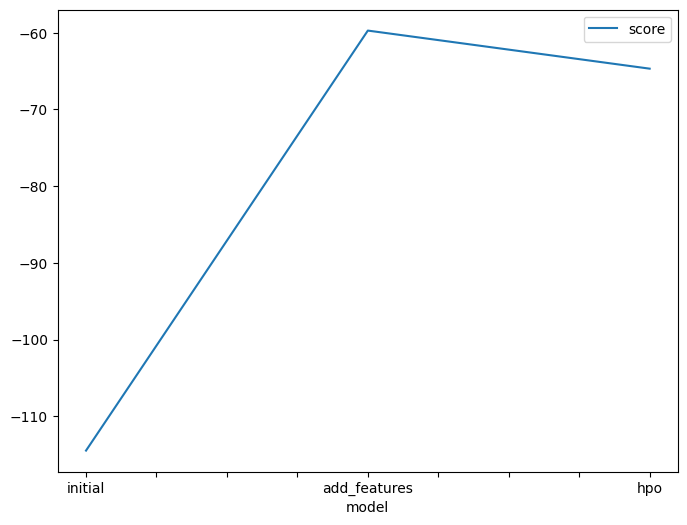

In [39]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-114.471103, -59.735369, -64.698247]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

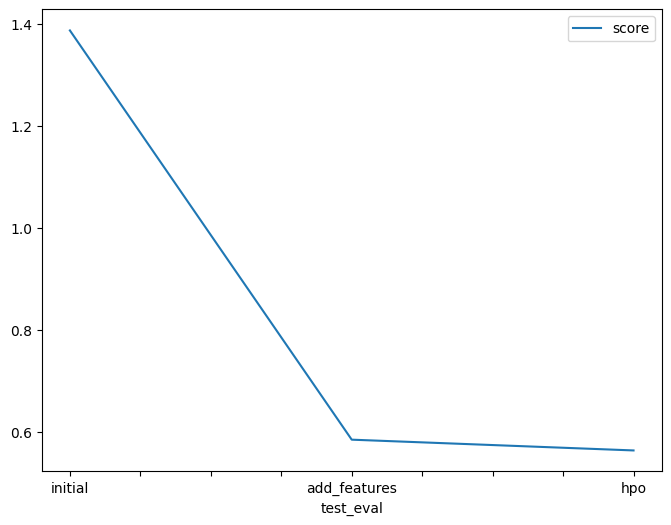

In [40]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.38713, 0.58444, 0.56331]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_test_score.png')

### Hyperparameter table

In [41]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.set_option('display.max_colwidth', 60)
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "'CAT': {'iterations': 10000},'RF': {'n_estimators': 300},'XT': {'n_estimators': 300}"],
    "hpo2": ["default", "default", "GB: num_boost_round=100, num_leaves(lower=26, upper=66, default=36)"],
    "hpo3": ["default", "default", "scheduler: local, searcher: bayesopt"],
    "score": [1.38713, 0.58444, 0.56331]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.38713
1,add_features,default,default,default,0.58444
2,hpo,"'CAT': {'iterations': 10000},'RF': {'n_estimators': 300}...","GB: num_boost_round=100, num_leaves(lower=26, upper=66, ...","scheduler: local, searcher: bayesopt",0.56331
